In [ ]:
import tensorflow as tf 
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


print( tf.__version__ )

2.8.0


In [ ]:
data = pd.read_csv("/content/Real estate valuation data set.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2112.917,32.0,84.87882,11,24.98298,121.54124,37.9
1,2,2112.917,19.5,316.59470,9,24.98134,121.53951,42.2
2,3,2113.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2113.511,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2112.833,5.0,391.56840,5,24.97937,121.54245,43.1


In [ ]:
for item in ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", 
                   "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area"]:

  max = data[ [item] ].values.max() 
  min = data[ [item] ].values.min() 
  data[item] = data[item].apply(lambda x: (x-min)/(max-min))

In [ ]:
X = data[ ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", 
                   "X4 number of convenience stores", "X5 latitude", "X6 longitude"] ].values


Y = data[ [ "Y house price of unit area" ] ].values 
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 ) 

X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 ) 
                                                           
test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 )

In [ ]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )

def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [ ]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
        
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
        #print(loss)
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 


Loss is 1.9093650579452515
Loss is 1.605225920677185
Loss is 1.354770541191101
Loss is 1.172619104385376
Loss is 1.0012181997299194
Loss is 0.9187057018280029
Loss is 0.7955799102783203
Loss is 0.7369678616523743
Loss is 0.6727280020713806
Loss is 0.642924964427948


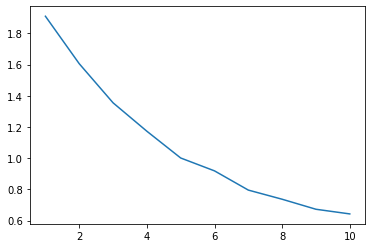

In [ ]:
import matplotlib.pyplot as plt

plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [ ]:
output = h(test_X , weights , bias) 
labels = test_Y

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error( test_Y, output)) 
print("Mean Squared Error:", metrics.mean_squared_error(test_Y,output))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(test_Y, output)))

Mean Absolute Error: 0.6593882
Mean Squared Error: 0.7098566
Root Mean Squared Error: 0.8425299
